# Random Forest Classifier

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
import pylab
import graphviz
from sklearn import tree
                

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
df=pd.read_csv("titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

In [8]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,1601,B96 B98,S
freq,1,577,7,4,644


In [12]:
df.duplicated().sum()/len(df)*100

0.0

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dropping irrelevant data features

In [15]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# apply label encoding on sex & embarked feature

In [18]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})

In [21]:
df['Embarked'].mode()

0    S
dtype: object

In [22]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [23]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

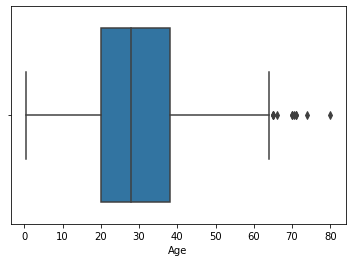

In [26]:
sns.boxplot(df['Age'])

In [27]:
df['Age'].median()

28.0

In [28]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [30]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# segreagate x and y

In [31]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [32]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,0
888,3,0,28.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [33]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# sepreate x and y for train and testing

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Fitting In Decision Tree

In [35]:
DT= DecisionTreeClassifier()

In [36]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred=DT.predict(x_test)

In [38]:
y_pred_train= DT.predict(x_train)

In [39]:
accuracy_score(y_pred,y_test)

0.7877094972067039

In [40]:
accuracy_score(y_pred_train,y_train)

0.9789325842696629

In [41]:
f1_score(y_pred,y_test)

0.7466666666666667

In [43]:
confusion_matrix(y_pred,y_test)

array([[85, 18],
       [20, 56]], dtype=int64)

# Hyper Parameter tuning for DecisionTreeClassifier

In [55]:
grid_param={
    'criterion': ['gini','entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter': ['best','random']
}

In [56]:
grid_search = GridSearchCV(estimator=DT,param_grid=grid_param,cv=5,n_jobs=-1,verbose=1)

In [57]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [61]:
grid_search.best_score_

0.8342755835713582

In [62]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 8,
 'min_samples_split': 7,
 'splitter': 'random'}

In [63]:
best_parameter= grid_search.best_params_

In [64]:
dt= DecisionTreeClassifier(criterion = 'gini',
 max_depth= 9,
 min_samples_leaf= 8,
 min_samples_split= 7,
 splitter= 'random')

In [67]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=8, min_samples_split=7,
                       splitter='random')

In [68]:
y_pred=dt.predict(x_test)

In [69]:
y_pred_train=dt.predict(x_train)

In [70]:
accuracy_score(y_pred,y_test)

0.7988826815642458

In [71]:
accuracy_score(y_pred_train,y_train)

0.8342696629213483

# Model Fitting In Random Forest

In [72]:
RF= RandomForestClassifier()

In [73]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
y_pred= RF.predict(x_test)

In [75]:
y_pred_train=RF.predict(x_train)

In [76]:
accuracy_score(y_pred,y_test)

0.8100558659217877

In [77]:
accuracy_score(y_pred_train,y_train)

0.9789325842696629

In [78]:
f1_score(y_pred,y_test)

0.7671232876712328

In [79]:
confusion_matrix(y_pred,y_test)

array([[89, 18],
       [16, 56]], dtype=int64)

# Hyper Parameter tunning for Random Forest Classifier

In [87]:
n_estimators=[1,2,4,8,16,32,64,100,200] # no. of trees
accuracy_result=[]
i=0
for estimator in n_estimators:
    rf=RandomForestClassifier(n_estimators=estimator,n_jobs=-1)  # n_jobs means the available processors in your system start doing
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    accuracy_result.append(acc)
    print("The acccuracy score using thiS", estimator,'is',accuracy_result[i],"\n\n")
    i=i+1

The acccuracy score using thiS 1 is 0.7541899441340782 


The acccuracy score using thiS 2 is 0.8212290502793296 


The acccuracy score using thiS 4 is 0.8100558659217877 


The acccuracy score using thiS 8 is 0.7653631284916201 


The acccuracy score using thiS 16 is 0.8156424581005587 


The acccuracy score using thiS 32 is 0.8268156424581006 


The acccuracy score using thiS 64 is 0.8156424581005587 


The acccuracy score using thiS 100 is 0.8268156424581006 


The acccuracy score using thiS 200 is 0.8100558659217877 




# you can see that n_estimator at 32 and 100 give the better performanmce around 83%

In [101]:
grid_param={
    'n_estimators':[16,32,100,130],
    'criterion': ['gini','entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['auto','log2']
}

In [102]:
rfc=RandomForestClassifier()

In [103]:
grid_search= GridSearchCV(estimator=rfc,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [105]:
# grid_search.fit(x_train,y_train)

In [95]:
# grid_search.best_score_

In [106]:
# grid_search.best_param_

In [107]:
# best_parameter= grid_search.best_params_

In [108]:
# rf= RandomForestClassifier(n_estimators=100,criterion = 'gini',
#  max_depth= 9,
#  min_samples_leaf= 8,
#  min_samples_split= 7,
#  max_features = 'auto')

In [109]:
# rf.fit(x_train,y_train)

In [110]:
# y_pred=rf.predict(x_test)

In [111]:
# y_pred_train=rf.predict(x_train)

In [112]:
# accuracy_score(y_pred,y_test)

In [113]:
# accuracy_score(y_pred_train,y_train)

In [114]:
# f1_score(y_pred_train,y_train)

In [115]:
# confusion_matrix(y_pred_train,y_train)